In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chest-xray-dataset/README.txt
/kaggle/input/chest-xray-dataset/Dataset5_raw_val.npz
/kaggle/input/chest-xray-dataset/Dataset5_raw_test.npz
/kaggle/input/chest-xray-dataset/Dataset5_raw_train.npz


In [3]:
os.listdir('/kaggle/input/chest-xray-dataset')

['README.txt',
 'Dataset5_raw_val.npz',
 'Dataset5_raw_test.npz',
 'Dataset5_raw_train.npz']

In [4]:
train=np.load('../input/chest-xray-dataset/Dataset5_raw_train.npz')
test=np.load('../input/chest-xray-dataset/Dataset5_raw_test.npz')
val=np.load('../input/chest-xray-dataset/Dataset5_raw_val.npz')

In [5]:
train

In [6]:
list(train.keys())

['image', 'image_name', 'image_label']

In [7]:
#train['image']

In [8]:
#test['image']

In [9]:
len(train['image'])

19610

In [10]:
len(test['image'])

6540

In [11]:
len(val['image'])

6534

In [12]:
type(train['image'])

numpy.ndarray

In [13]:
# Common
import os 
import keras
import numpy as np 
import tensorflow as tf

# Data 
from keras.preprocessing.image import ImageDataGenerator
# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Pre-Trained Model
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

Before loading the data, let's have a view of class distributions

In [14]:
# Class Names
class_labels = np.unique(train['image_label'])
class_labels

array([0., 1., 2., 3., 4.])

We have 5 distinct classes labelled 0-4 where
* COVID-19 :  4,189 : 0
* Lung-Opacity : 6,012 : 1
* Normal : 10,192 : 2
* Viral Pneumonia : 7,397 : 3
* Tuberculosis : 4,897 : 4
------------------------------
Total : 32,687
------------------------------

In [15]:
class_names=np.unique(train['image_name'])
class_names
print(f"Total number of distinct images", len(class_names))

Total number of distinct images 19610


All image names are unique

In [16]:
# visualize class names
classes = np.size(class_labels)
classes

5

In [17]:
class_label, count=np.unique(train['image_label'], return_counts=True)
#display the count and name side by side
print(np.asarray((class_label,count)).T)

[[0.000e+00 2.512e+03]
 [1.000e+00 3.607e+03]
 [2.000e+00 6.115e+03]
 [3.000e+00 4.438e+03]
 [4.000e+00 2.938e+03]]


In [18]:
class_label_1, count_1=np.unique(val['image_label'], return_counts=True)
#display the count and name side by side
print(np.asarray((class_label_1,count_1)).T)

[[0.000e+00 8.360e+02]
 [1.000e+00 1.202e+03]
 [2.000e+00 2.038e+03]
 [3.000e+00 1.479e+03]
 [4.000e+00 9.790e+02]]


In [19]:
class_label_2, count_2=np.unique(test['image_label'], return_counts=True)
#display the count and name side by side
print(np.asarray((class_label,count)).T)

[[0.000e+00 2.512e+03]
 [1.000e+00 3.607e+03]
 [2.000e+00 6.115e+03]
 [3.000e+00 4.438e+03]
 [4.000e+00 2.938e+03]]


In [20]:
# Visualize train data visualization
fig = px.pie(names=class_label, values=count, title="Class Distribution for training set", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

Classes needs to be equally distributed so that the model is not biased towards any class, and now, the distribution of data for modelling should be this way

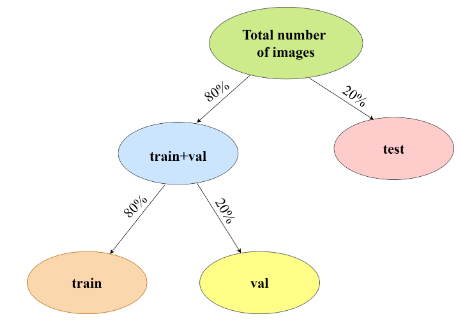

In [21]:
fig1 = px.pie(names=class_label_1, values=count_1, title="Class Distribution for validation set", hole=0.4)
fig1.update_layout({'title':{'x':0.5}})
fig1.show()

In [22]:
fig = px.pie(names=class_label_2, values=count_2, title="Class Distribution for test set", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()